In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv


## Importing Dataset

In [2]:
df = pd.read_csv("/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv")

## Exploring Dataset

In [3]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [4]:
df.shape

(207, 41)

**-> Data is very small, only 207 rows**<br>
**-> but data has a large number of features (41 features)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

**-> 22 Categorical features and <br>
-> 19 Numerical features**

**-> The data is very small, so even if there are some outliers we should not remove it<br>
-> As it will decrease our dataset**

In [6]:
df.describe()

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


## Data Cleaning

**-> Dropping some columns<br>
-> `Unnamed: 0` and `ID` columns are index numbers and<br>
-> `ICO Number` have too many missing values**

In [7]:
df.drop(labels=["Unnamed: 0", "ICO Number", "ID"], axis=1, inplace=True)

**-> Replacing categorical features missing values with most frequent values<br> 
-> If we had large data set we might drop these rows because mising values are very little**

In [8]:
from sklearn.impute import SimpleImputer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
cat_imputer = SimpleImputer(strategy="most_frequent")

In [10]:
cat_list = df.select_dtypes(include=["object"]).columns.tolist()

In [11]:
df[cat_list] = cat_imputer.fit_transform(df[cat_list])

**-> Converting some Categorical features to Numeric features**

In [12]:
df["Bag Weight"] = df["Bag Weight"].str.split().str.get(0).astype(int)

In [13]:
df["Harvest Year"] = df["Harvest Year"].str.split("/").str.get(0).astype(int)

In [14]:
df["Grading Date"] = df["Grading Date"].str.split(",").str.get(1).astype(int)

In [15]:
df["Expiration"] = df["Expiration"].str.split(",").str.get(1).astype(int)

In [16]:
df["Color"].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

**Dropping some more columns**

* `Certification Contact` is not relatable with `Total Cup Points`
* `Certificaion Address` will be dropped because `Certification Body` have country name of `Certification Address`
* `Lot Number` have no impact on target variable.
* `Altitude` will be dropped because we will have `Country of Origin`
* `Farm Name` and `Mill` have the almost the same value, so `Mill` will be dropped.
* `Status` has only one value 1, so it will be dropped.

In [17]:
df.drop(labels=["Certification Contact", "Certification Address", "Lot Number", "Altitude", "Mill", "Status"], axis=1, 
        inplace=True)

**Removing Numerical features with low correlation with `Total Cup Points`**

In [18]:
corr_matrix = df.corr()
corr_matrix["Total Cup Points"].sort_values(ascending=False)

/tmp/ipykernel_23/3814163101.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Total Cup Points        1.000000
Overall                 0.947217
Flavor                  0.939124
Aftertaste              0.934813
Balance                 0.929520
Acidity                 0.897057
Aroma                   0.868919
Body                    0.847216
Bag Weight              0.038214
Uniformity              0.003556
Moisture Percentage    -0.046476
Category One Defects   -0.058156
Harvest Year           -0.127567
Grading Date           -0.193894
Expiration             -0.193894
Number of Bags         -0.243753
Category Two Defects   -0.314092
Quakers                -0.320307
Clean Cup                    NaN
Sweetness                    NaN
Defects                      NaN
Name: Total Cup Points, dtype: float64

In [19]:
drop_attr = ["Clean Cup", "Sweetness", "Defects", "Bag Weight", "Uniformity", "Moisture Percentage", 
             "Category One Defects", "Harvest Year", "Grading Date", "Expiration", "Number of Bags"]
df.drop(labels=drop_attr, axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             207 non-null    object 
 2   Company               207 non-null    object 
 3   Region                207 non-null    object 
 4   Producer              207 non-null    object 
 5   In-Country Partner    207 non-null    object 
 6   Owner                 207 non-null    object 
 7   Variety               207 non-null    object 
 8   Processing Method     207 non-null    object 
 9   Aroma                 207 non-null    float64
 10  Flavor                207 non-null    float64
 11  Aftertaste            207 non-null    float64
 12  Acidity               207 non-null    float64
 13  Body                  207 non-null    float64
 14  Balance               207 non-null    float64
 15  Overall               2

In [21]:
df.isnull().sum()

Country of Origin       0
Farm Name               0
Company                 0
Region                  0
Producer                0
In-Country Partner      0
Owner                   0
Variety                 0
Processing Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Overall                 0
Total Cup Points        0
Quakers                 0
Color                   0
Category Two Defects    0
Certification Body      0
dtype: int64

## Visualizing Data

In [22]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**New Correlation Heatmap**

In [23]:
corr_matrix = df.corr()
corr_matrix["Total Cup Points"].sort_values(ascending=False)

Total Cup Points        1.000000
Overall                 0.947217
Flavor                  0.939124
Aftertaste              0.934813
Balance                 0.929520
Acidity                 0.897057
Aroma                   0.868919
Body                    0.847216
Category Two Defects   -0.314092
Quakers                -0.320307
Name: Total Cup Points, dtype: float64

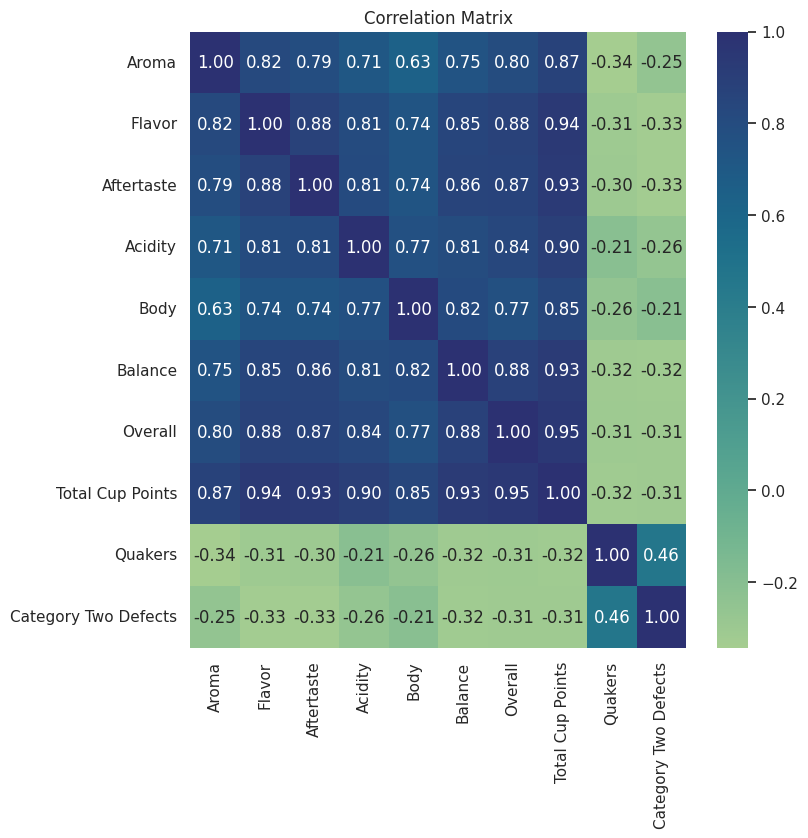

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cbar=True, fmt=".2f", cmap="crest")
plt.title("Correlation Matrix")
plt.show()

In [25]:
cat_list = df.select_dtypes(include=["object"]).columns.tolist()
num_list = df.select_dtypes(exclude=["object"]).columns.tolist()

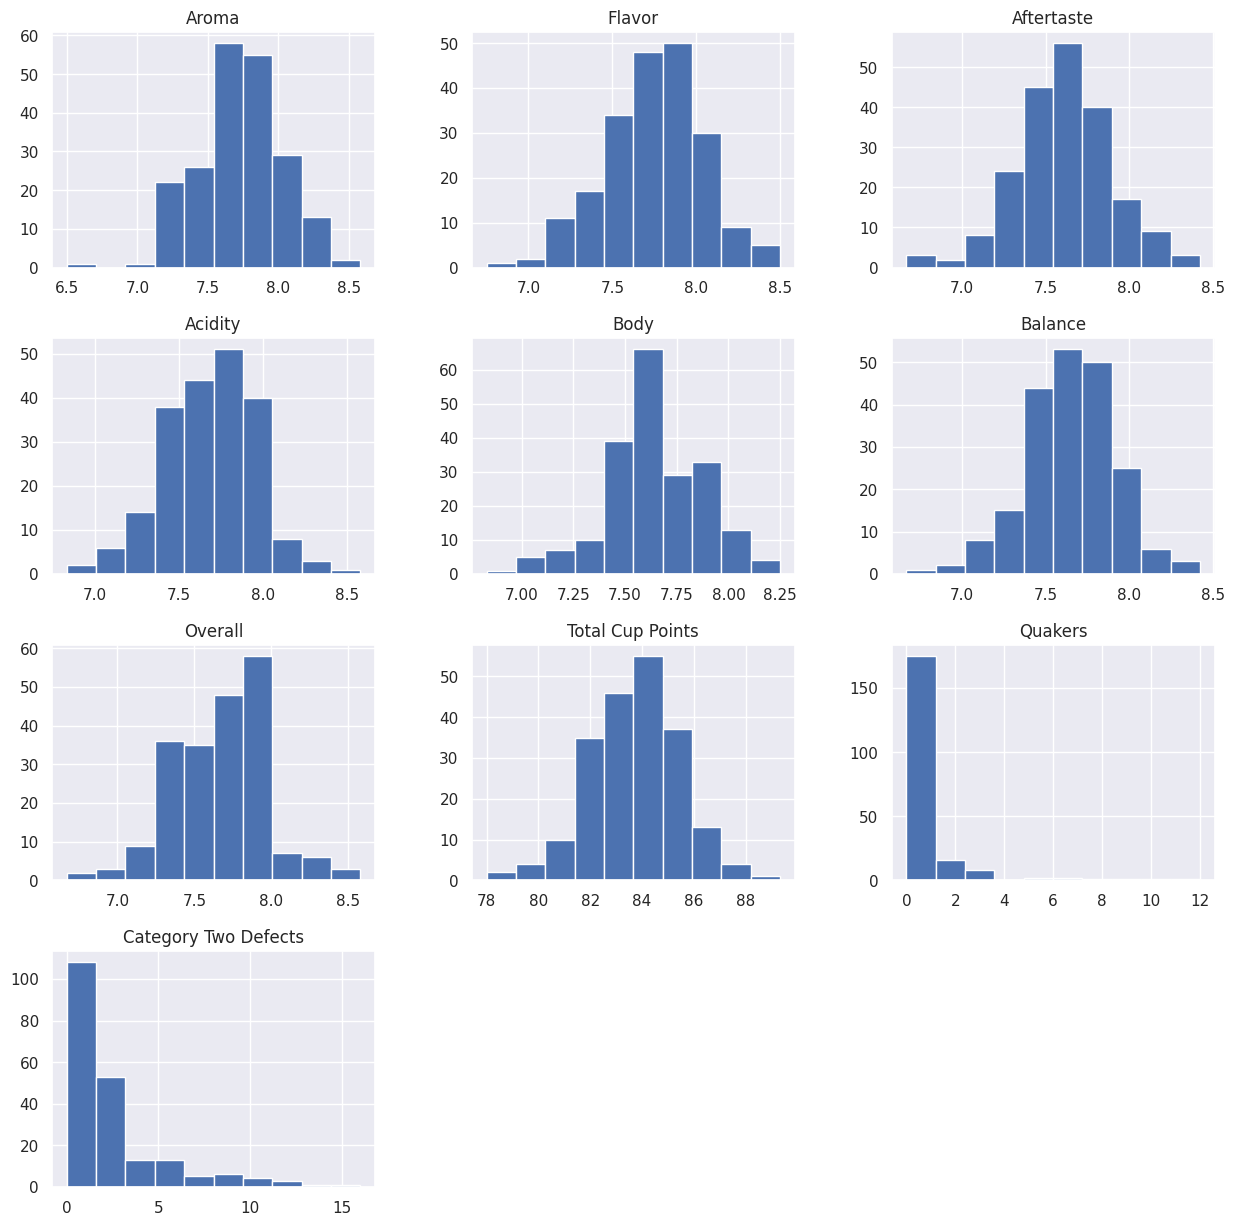

In [26]:
df.hist(figsize=(15, 15))
plt.show()

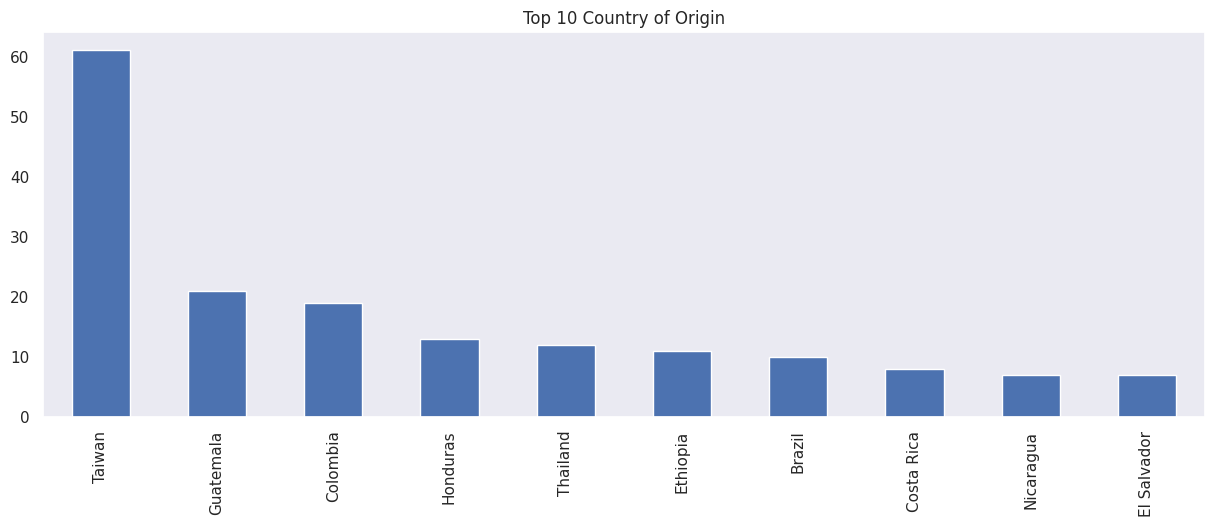

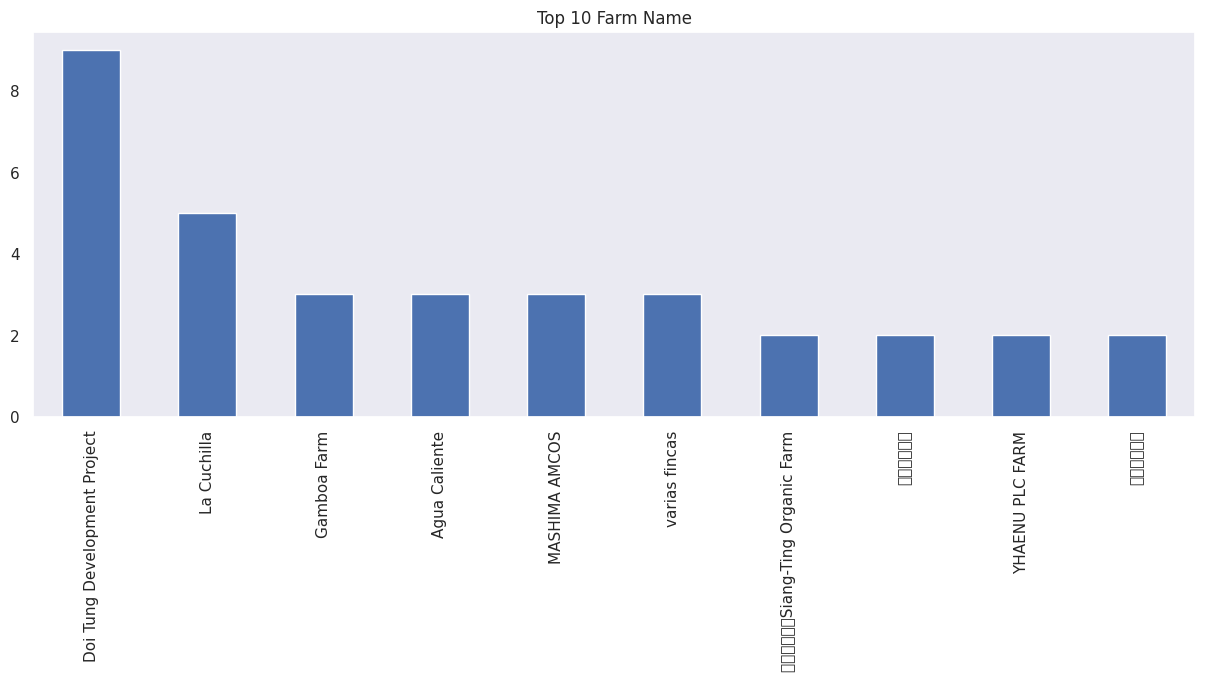

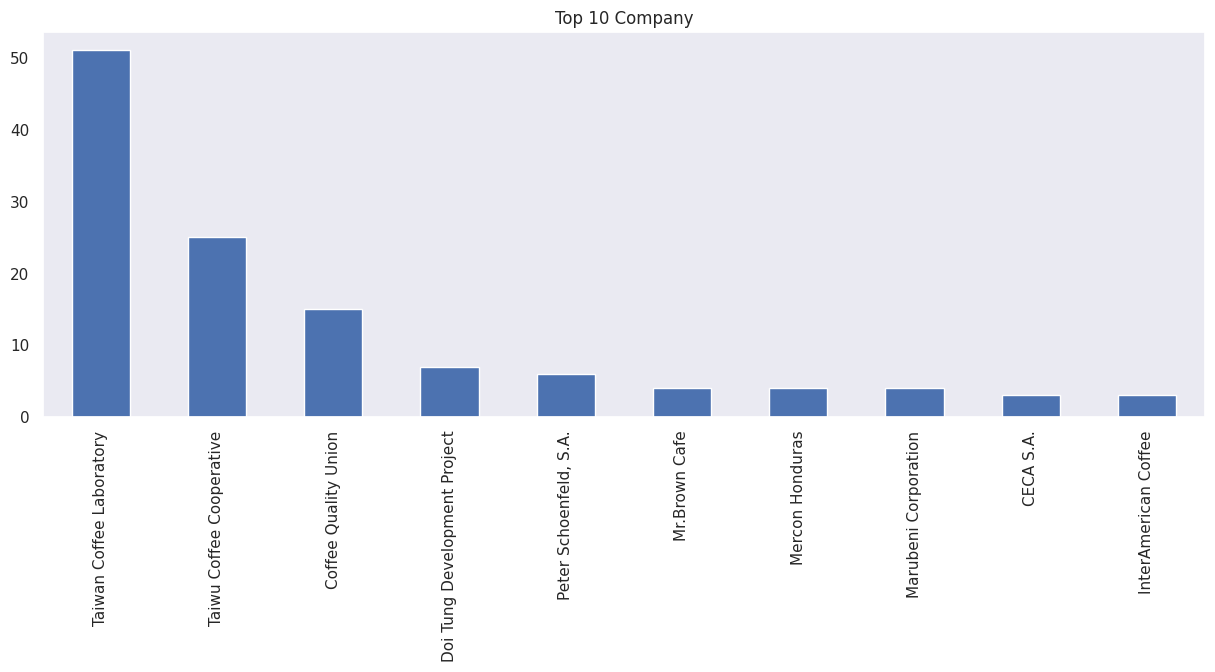

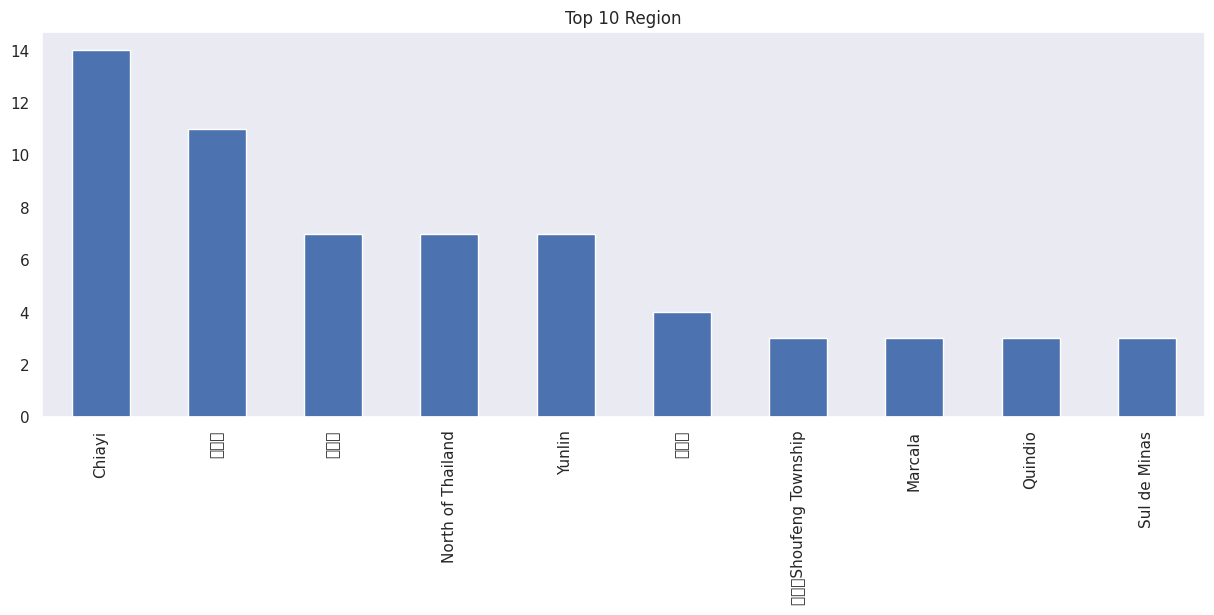

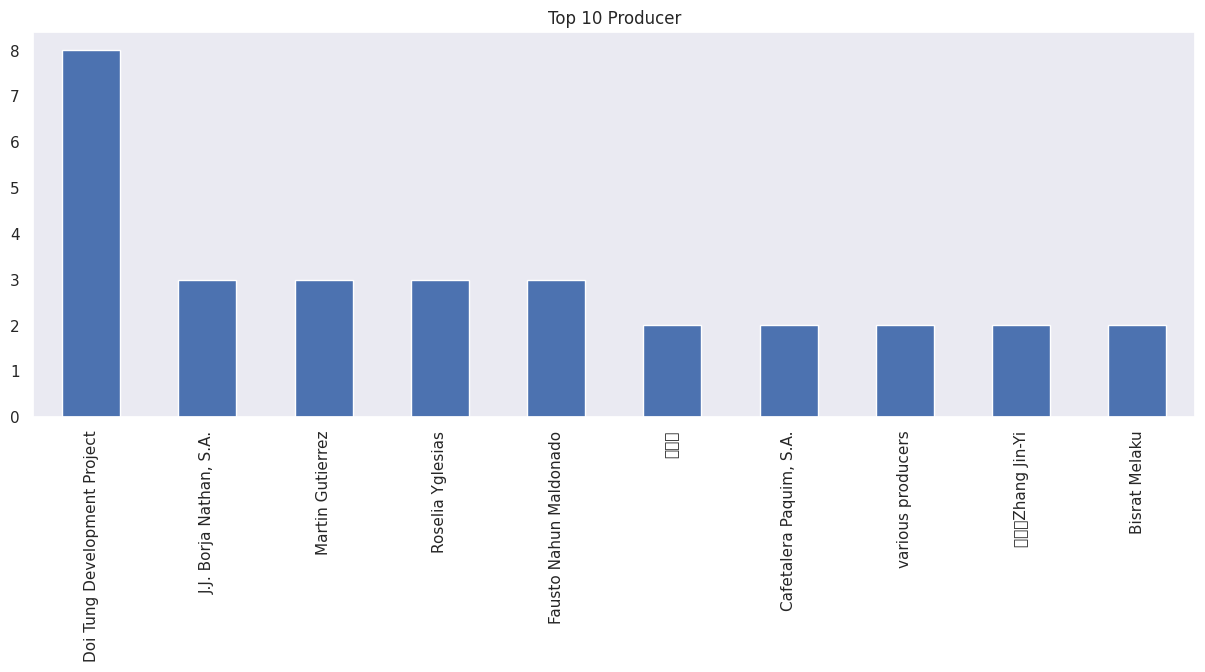

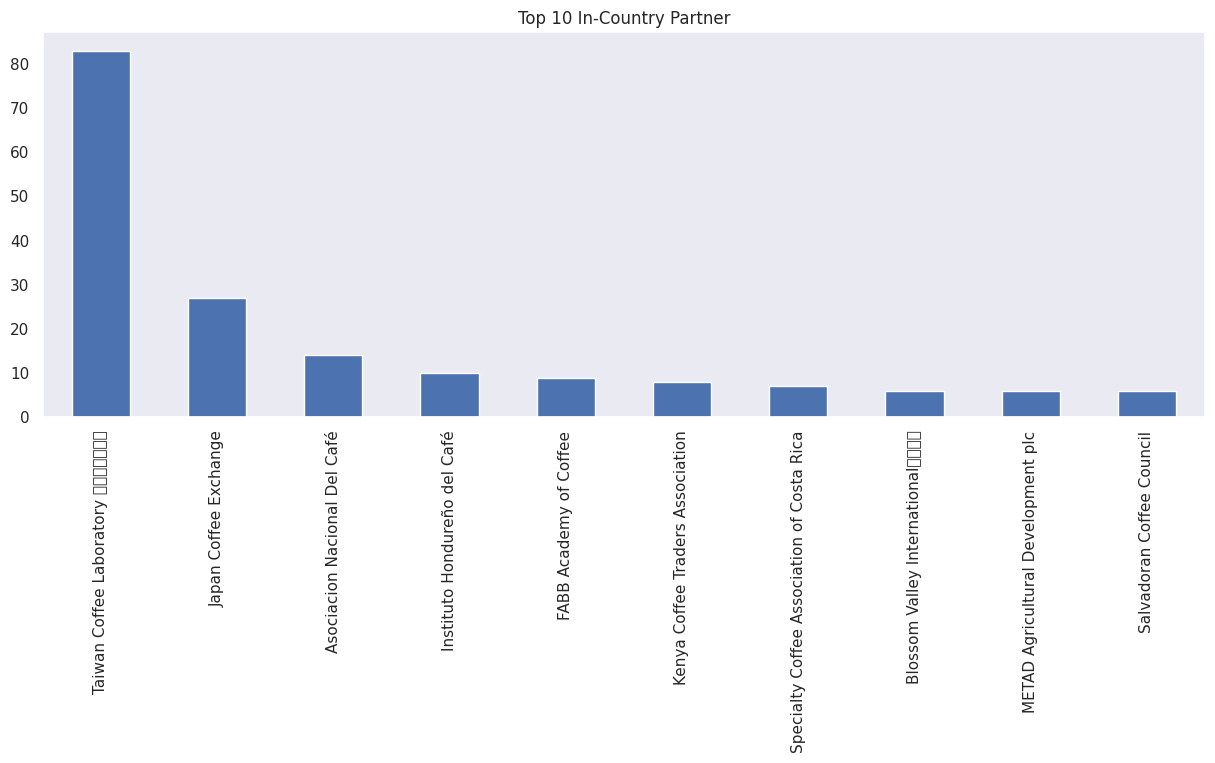

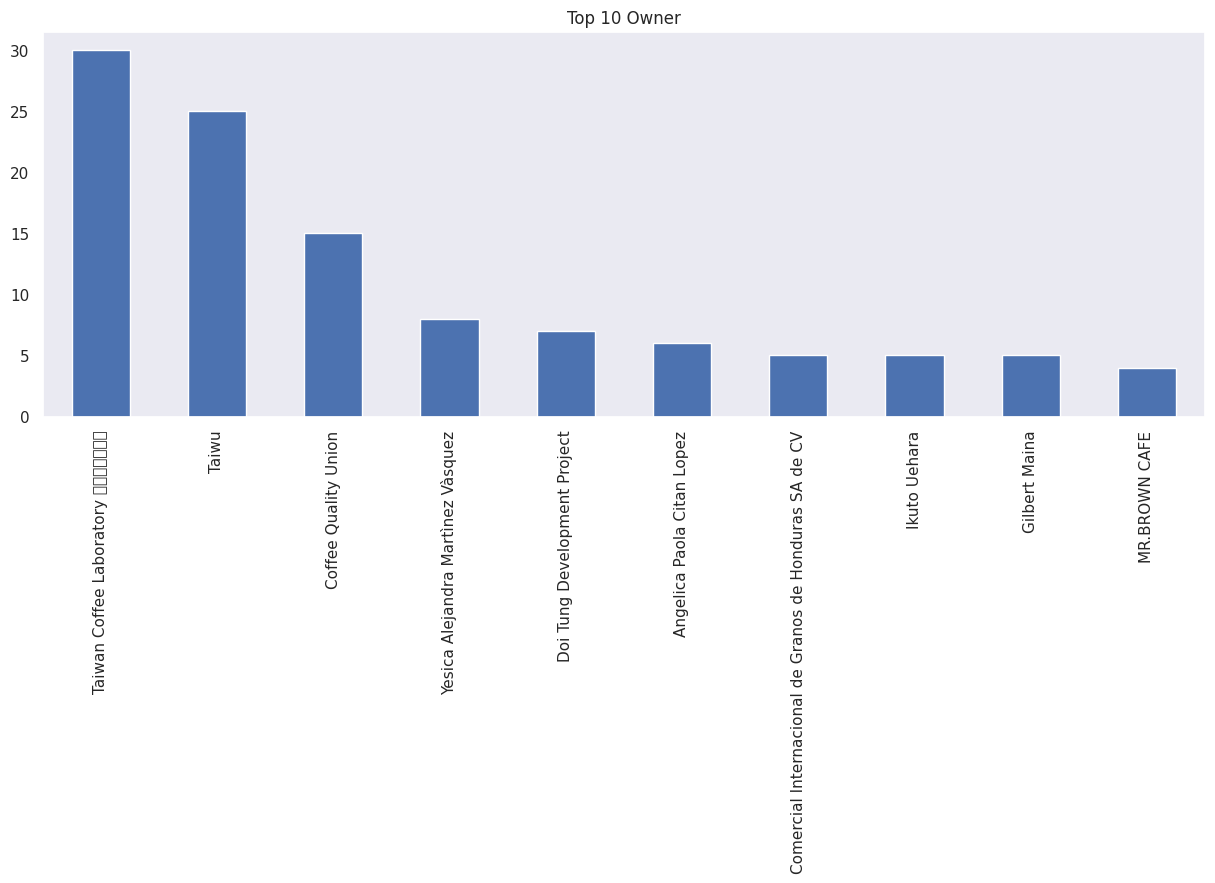

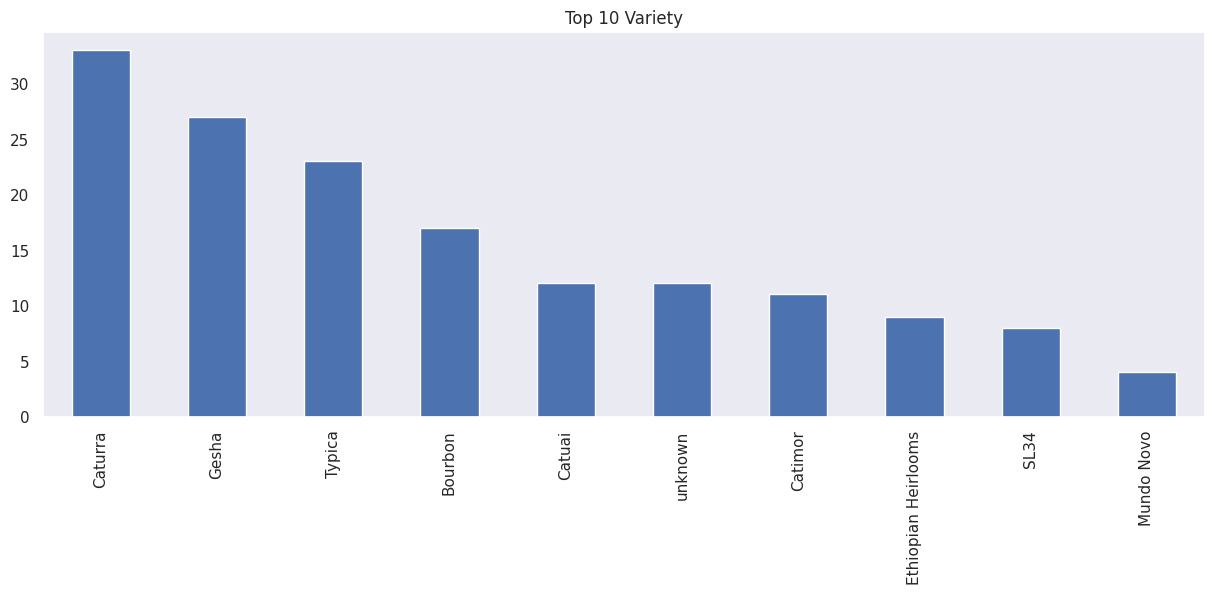

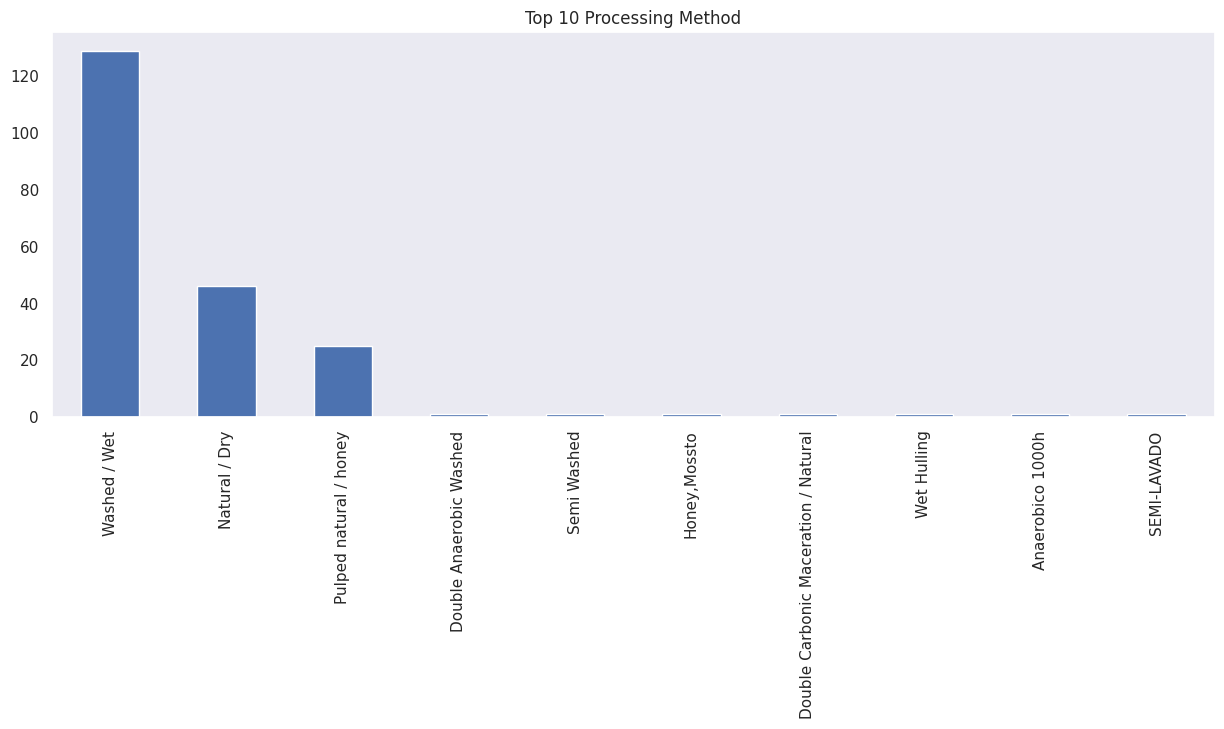

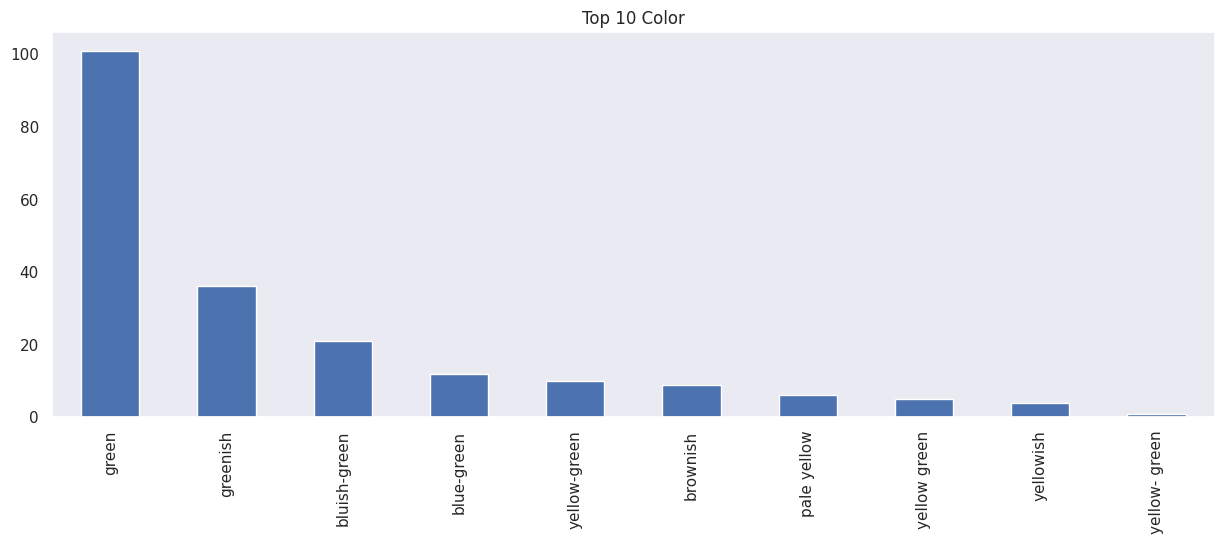

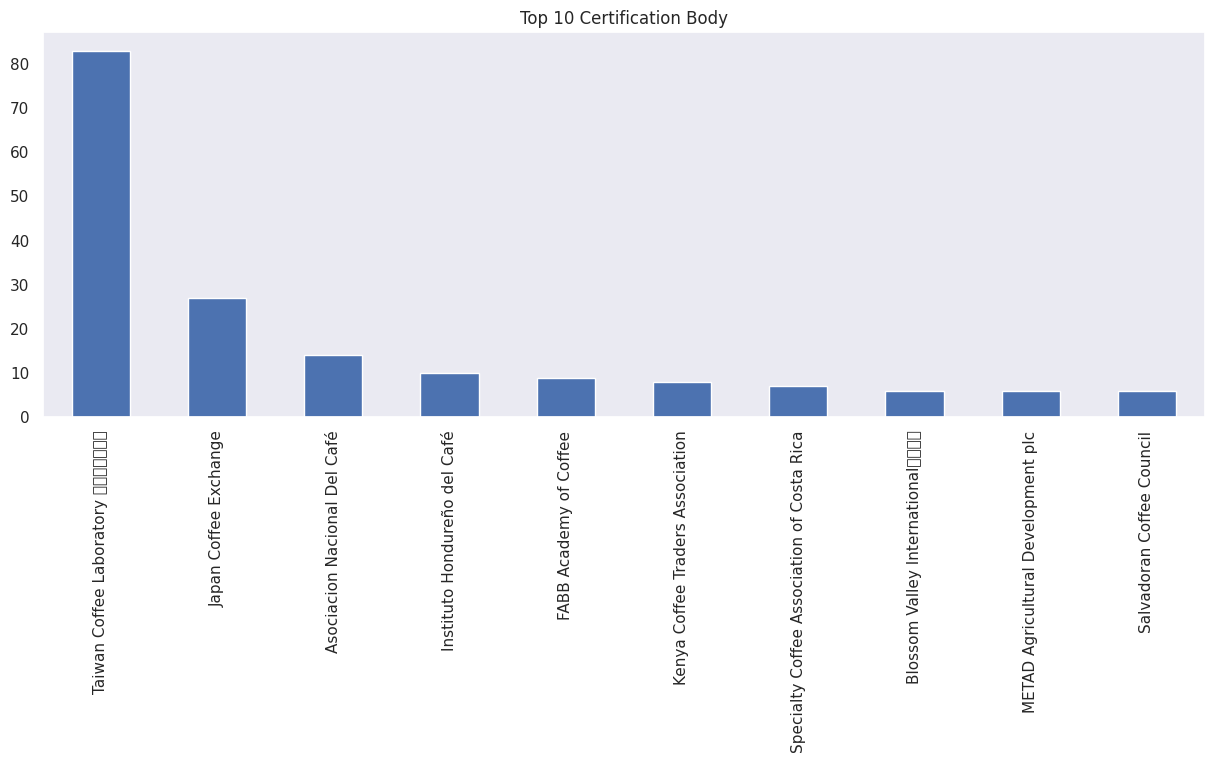

In [27]:
for col in cat_list: 
    plt.figure(figsize=(15,5))
    top10 = df[col].value_counts()[:10]
    top10.plot(kind='bar')
    plt.title("Top 10 " + col)
    plt.grid(visible=False)
    plt.show()

In [28]:
len(cat_list)

11